### - Sobhan Moradian Daghigh
#### - 4/11/2022
#### - DIP - HW01 - Q4

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [15]:
def load_images():
    images = glob.glob('./inputs/P4/*.png')
    
    names = []
    imgs = []
    for image in images:
        name = image.split('\\')[-1][:-4]
        if name == 'maze':
            maze = cv2.imread(image)
            maze = cv2.cvtColor(maze, cv2.COLOR_BGR2RGB)
            
        else:
            img = cv2.imread(image)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            names.append(name)
            imgs.append(img)    
            
    return names, imgs, maze

In [16]:
item_names, item_imgs, maze_img = load_images()

In [18]:
def plotter(img):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(img)

In [71]:
def get_dots_position(maze_img, dot, power_pellet):
    dots_positions = []
    power_pellet_positions = []
    margin = power_pellet.shape[0]
    extended_dot = np.zeros(np.add(dot.shape, (2, 2, 0))).astype(np.uint8)
    extended_dot[1:-1, 1:-1] = dot
    
    
    for i in range(margin, maze_img.shape[0] - margin):
        for j in range(margin, maze_img.shape[1] - margin):
            if (maze_img[i - 1:i + dot.shape[0] + 1, j - 2:j + dot.shape[1]] == extended_dot).all():
                dots_positions.append((i, j))
            
            if (maze_img[i:i + power_pellet.shape[0], j - 2:j + power_pellet.shape[1] - 2] == power_pellet).all():
                power_pellet_positions.append((i, j))
    
    return dots_positions, power_pellet_positions

In [949]:
def init_game(maze_img, item_imgs, item_names):
    maze_img = maze_img.copy()
    dots_pos, power_pellet_pos = get_dots_position(maze_img, item_imgs[item_names.index('dot')], 
                                                   item_imgs[item_names.index('power_pellet')])
    
    idxs = np.random.choice(np.array(range(len(dots_pos))), 5, replace=False)
    rand_positions = np.array(dots_pos)[idxs]
    
    pacman_closed = item_imgs[item_names.index('pacman_closed')]
    height, width = rand_positions[0][0], rand_positions[0][1]
    maze_img[height - 6: height + 7, width - 6: width + 7] = pacman_closed
    
    blinky_move1_down = item_imgs[item_names.index('blinky_move1_down')]
    height, width = rand_positions[1][0], rand_positions[1][1]
    maze_img[height - 7: height + 9, width - 7: width + 7] = blinky_move1_down
    
    clyde_move1_left = item_imgs[item_names.index('clyde_move1_left')]
    height, width = rand_positions[2][0], rand_positions[2][1]
    maze_img[height - 7: height + 9, width - 7: width + 7] = clyde_move1_left
    
    inky_move1_left = item_imgs[item_names.index('inky_move1_left')]
    height, width = rand_positions[3][0], rand_positions[3][1]
    maze_img[height - 7: height + 9, width - 7: width + 7] = inky_move1_left
    
    pinky_move1_up = item_imgs[item_names.index('pinky_move1_up')]
    height, width = rand_positions[4][0], rand_positions[4][1]
    maze_img[height - 7: height + 9, width - 7: width + 7] = pinky_move1_up
    
    return maze_img, rand_positions, dots_pos

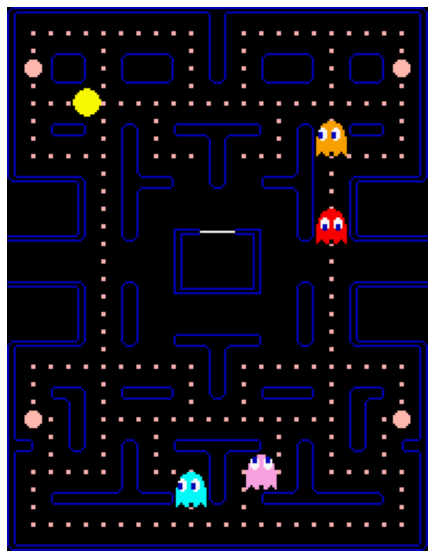

In [1665]:
game_img, char_positions, dots_pos = init_game(maze_img, item_imgs, item_names)
plotter(game_img)

In [951]:
def make_blank(img):
    return np.zeros(img.shape)

In [1666]:
def gen_demo(game_img, item_imgs, item_names, char_positions, dots_pos, direction, mouth):
    
    pacman_closed   = item_imgs[item_names.index('pacman_closed')]
    pacman_half_down   = item_imgs[item_names.index('pacman_half_down')]
    pacman_half_left   = item_imgs[item_names.index('pacman_half_left')]
    pacman_half_right  = item_imgs[item_names.index('pacman_half_right')]
    pacman_half_up     = item_imgs[item_names.index('pacman_half_up')]
    pacman_open_down   = item_imgs[item_names.index('pacman_open_down')]
    pacman_open_left   = item_imgs[item_names.index('pacman_open_left')]
    pacman_open_right  = item_imgs[item_names.index('pacman_open_right')]
    pacman_open_up     = item_imgs[item_names.index('pacman_open_up')]
    
    height, width = char_positions[0][0], char_positions[0][1]
    
    if direction == 'up':
        if not np.array_equal(game_img[height - 6 - 3, width - 6], [0, 0, 184]) and not np.array_equal(game_img[height - 6 - 3, width + 6], [0, 0, 184]):
            print('up')
            game_img[height - 6: height + 7, width - 6: width + 7] = make_blank(pacman_closed)

            if (height, width) in dots_pos:
                game_img[height - 6 - 2: height + 7 - 2, width - 6: width + 7] = pacman_open_up
                dots_pos.remove((height, width))
                mouth = 0
            else:
                if mouth % 2 == 0:
                    game_img[height - 6 - 2: height + 7 - 2, width - 6: width + 7] = pacman_half_up
                    mouth += 1
                    
                elif mouth % 2 == 1:
                    game_img[height - 6 - 2: height + 7 - 2, width - 6: width + 7] = pacman_closed
                    mouth += 1
                
            char_positions[0] = np.array([height - 2, width])
        else:
            direction = np.random.choice(['down', 'left', 'right'])
            print(direction)
            
            
    elif direction == 'right':
        if not np.array_equal(game_img[height - 6, width + 6 + 2], [0, 0, 184]) and not np.array_equal(game_img[height + 6, width + 6 + 2], [0, 0, 184]):
            print('right')
            game_img[height - 6: height + 7, width - 6: width + 7] = make_blank(pacman_closed)
            if (height, width) in dots_pos:
                game_img[height - 6: height + 7, width - 6 + 2: width + 7 + 2] = pacman_open_right
                dots_pos.remove((height, width))
                
            else:
                if mouth % 2 == 0:
                    game_img[height - 6: height + 7, width - 6 + 2: width + 7 + 2] = pacman_half_right
                    mouth += 1
                    
                elif mouth % 2 == 1:
                    game_img[height - 6: height + 7, width - 6 + 2: width + 7 + 2] = pacman_closed
                    mouth += 1
                
            char_positions[0] = np.array([height, width + 2])
        else:
            direction = np.random.choice(['up', 'down', 'left'])
            print(direction)
            
            
    elif direction == 'down':
        if not np.array_equal(game_img[height + 6 + 4, width - 6], [0, 0, 184]) and not np.array_equal(game_img[height + 6 + 4, width + 6], [0, 0, 184]):
            print('down')
            game_img[height - 6: height + 7, width - 6: width + 7] = make_blank(pacman_closed)
            if (height, width) in dots_pos:
                game_img[height - 6 + 2: height + 7 + 2, width - 6: width + 7] = pacman_open_down
                dots_pos.remove((height, width))
                
            else:
                if mouth % 2 == 0:
                    game_img[height - 6 + 2: height + 7 + 2, width - 6: width + 7] = pacman_half_down
                    mouth += 1
                    
                elif mouth % 2 == 1:
                    game_img[height - 6 + 2: height + 7 + 2, width - 6: width + 7] = pacman_closed
                    mouth += 1
                
            char_positions[0] = np.array([height + 2, width])
        else:
            direction = np.random.choice(['up', 'left', 'right'])
            print(direction)
            
            
    elif direction == 'left':
        if not np.array_equal(game_img[height - 6, width - 6 - 3], [0, 0, 184]) and not np.array_equal(game_img[height + 6, width - 6 - 3], [0, 0, 184]):
            print('left')
            game_img[height - 6: height + 7, width - 6: width + 7] = make_blank(pacman_closed)
            if (height, width) in dots_pos:
                game_img[height - 6: height + 7, width - 6 - 2: width + 7 - 2] = pacman_open_left
                dots_pos.remove((height, width))
                
            else:
                if mouth % 2 == 0:
                    game_img[height - 6: height + 7, width - 6 - 2: width + 7 - 2] = pacman_half_left
                    mouth += 1
                    
                elif mouth % 2 == 1:
                    game_img[height - 6: height + 7, width - 6 - 2: width + 7 - 2] = pacman_closed
                    mouth += 1
                
            char_positions[0] = np.array([height, width - 2])
        else:
            direction = np.random.choice(['up', 'down', 'right'])
            print(direction)
    
        
    return game_img, char_positions, direction, mouth

down


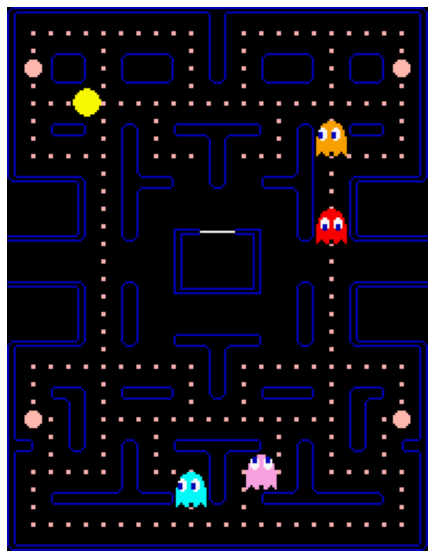

In [1667]:
mouth = 0
frames = []
frames.append(game_img.copy())
next_game_img, char_positions, direction, mouth = gen_demo(game_img, item_imgs, item_names, char_positions, dots_pos, 'up', mouth)
frames.append(next_game_img.copy())
plotter(next_game_img)

right


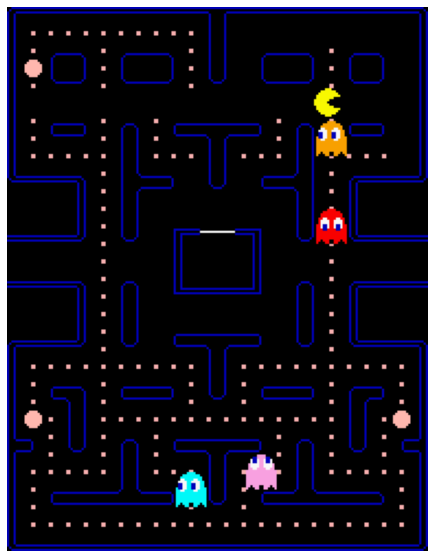

In [1883]:
next_game_img, char_positions, direction, mouth = gen_demo(next_game_img, item_imgs, item_names, char_positions, dots_pos, direction, mouth)
frames.append(next_game_img.copy())
plotter(next_game_img)

In [1889]:
out = cv2.VideoWriter('./PocManVideo.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, (maze_img.shape[1], maze_img.shape[0]))
 
for frame in frames:
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

cv2.destroyAllWindows()    
out.release()